# Beleg 2: Bilddateien, Bilddarstellung und Bilddiskretisierung

**Name:**Jonas Wonneberger
<br>
**Matrikelnr.:**s0582006

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Mi, 17.11.2022
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Mi, 05.01.2023


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Segmentierung von Mitosen im PHH3

In dieser Aufgabe werden Sie sich mit der Segmentierung von Mitosen auseinandersetzen. Mitosen sind Zellen, die sich gerade in Teilung befinden. Zwar ist dies ist ein natürlicher Prozess, jedoch findet er so selten statt, dass es statistisch unwahrscheinlich ist, eine Mitose in einem histologischen Schnitt zu finden. Innerhalb von Tumorgewebe jedoch ist die Proliferationsrate (sprich die Rate, mit der sich das Gewebe durch Zellteilung vermehrt) deutlich höher. Für diverse Tumorentitäten spielt die Erfassung dieser Proliferationsrate, etwa durch Auszählung von Mitosen, eine wesentliche Rolle in der Bewertung der Malignität.

### Viel Erfolg!

**Aufgabe 1.1**: Schauen Sie sich zunächst die Bilder im Ordner `mitosis_set` an. Hierbei handelt es sich um invasives Mammakarzinom, welches mit der IHC-Färbung für das Protein Phosphohistone-H3 (PHH3) gefärbt wurde. Der braune Ton der Mitosen entsteht durch Diaminobenzidine (DAB) welches an die entsprechenden Antikörper für das PHH3 gebunden ist. Die blaue Färbung der nicht-mitotischen Zellkerne entsteht durch Haematoxylin. 

Die Dateinamen der Bilder enthalten jeweils zwei Informationen: Zum einen die ID des Bilders (eine fortlaufende Nummer beginnend mit 01) sowie die Anzahl der jeweils im Bild enthaltenen Mitosen. Die Angaben sind durch einen Underscore (\_) getrennt. Lesen Sie nun alle Bilder ein. Überlegen Sie sich eine passende Datenstruktur zur Speicherung der jeweiligen Anzahl an Mitosen.

In [23]:
import os
from operator import itemgetter #to sort a dictionary in an array

res = []
files = os.listdir('mitosis_set')
for i in range(0,len(files)):
    dictionarieName = files[i]
    ID = dictionarieName.split("_")
    mitoses_count = ID[1].split(".png")
    dictionarieName = {"data_name" : dictionarieName, "ID" : ID[0], "mitoses_count": mitoses_count[0]}
    res.append(dictionarieName)
    res = sorted(res, key=itemgetter('ID'))


[{'data_name': '01_0.png', 'ID': '01', 'mitoses_count': '0'}, {'data_name': '02_2.png', 'ID': '02', 'mitoses_count': '2'}, {'data_name': '03_1.png', 'ID': '03', 'mitoses_count': '1'}, {'data_name': '04_3.png', 'ID': '04', 'mitoses_count': '3'}, {'data_name': '05_0.png', 'ID': '05', 'mitoses_count': '0'}, {'data_name': '06_3.png', 'ID': '06', 'mitoses_count': '3'}, {'data_name': '07_2.png', 'ID': '07', 'mitoses_count': '2'}, {'data_name': '08_1.png', 'ID': '08', 'mitoses_count': '1'}, {'data_name': '09_2.png', 'ID': '09', 'mitoses_count': '2'}, {'data_name': '10_1.png', 'ID': '10', 'mitoses_count': '1'}, {'data_name': '11_0.png', 'ID': '11', 'mitoses_count': '0'}, {'data_name': '12_3.png', 'ID': '12', 'mitoses_count': '3'}, {'data_name': '13_1.png', 'ID': '13', 'mitoses_count': '1'}, {'data_name': '14_2.png', 'ID': '14', 'mitoses_count': '2'}, {'data_name': '15_0.png', 'ID': '15', 'mitoses_count': '0'}, {'data_name': '16_1.png', 'ID': '16', 'mitoses_count': '1'}, {'data_name': '17_0.png

**Aufgabe 1.2**: Entwickeln Sie ein Verfahren zur Segmentierung der Mitosen. Als Teilschritte sollen sowohl die Segmentierungsmasken als auch die im Originalbild hevorgehobenen Mitosen (entweder, indem das Bild anhand der Maske zugeschnitten oder indem die Mitosen mit einem Polygon markiert wurden) ausgegeben werden. Am Ende soll für jedes Bild die Anzahl an gefundenen Mitosen ausgegeben werden. Beginnen Sie erst mit Aufgabe 1.3, wenn ihr Algorithmus für jedes Bild die korrekte Anzahl an Mitosen findet. 

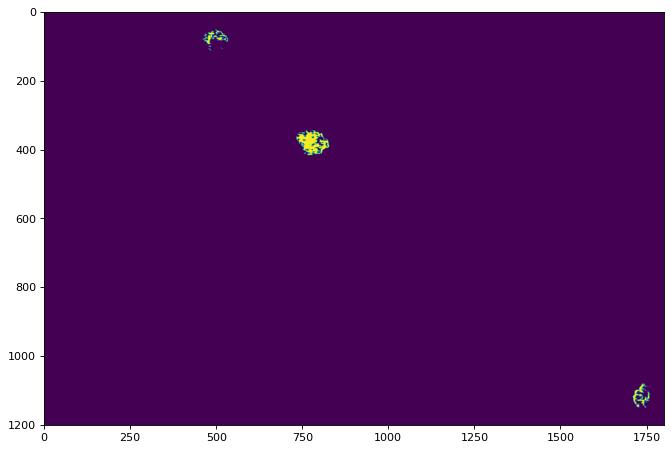

In [6]:
# 1.2
import cv2
import numpy as np
from matplotlib import pyplot as plt


original = cv2.imread('mitosis_set/04_3.png')

hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

lower_colors = np.array([10, 60, 20])
upper_colors = np.array([20, 255, 255])

mask =  cv2.inRange(hsv, lower_colors, upper_colors)
res = cv2.bitwise_and(original, original, mask=mask)

plt.figure(num=None, figsize=(10, 12), dpi=80)
plt.imshow(mask)

**Aufgabe 1.3**: Lesen Sie nun die Dateien aus dem Ordner `mitosis_test_set` ein, indem Sie erneut ihre zuvor definierte Datenstruktur verwenden. Wenden Sie ihr Verfahren einmalig auf diese Daten an (einmalig in dem Sinne, dass keine weitere Optimierung des Algorithmus durchgeführt wird) und geben Sie für jedes Bild aus, wieviele Mitosen ihre Implementierung gefunden hat und wieviele laut Dateinamen zu finden gewesen wären. Schließlich geben Sie noch die Genaugikeit ihrer Lösung für diesen Datensatz an, in dem Sie die Gesamtzahl der gefundenen Mitosen durch die Gesamtzahl der tatsächlichen Mitosen teilen.

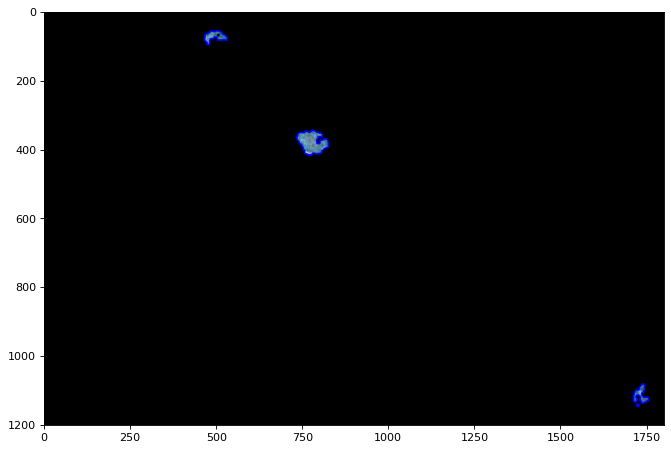

In [12]:
#1.3
import cv2
import numpy as np

img = cv2.imread('mitosis_set/04_3.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
bound_lower = np.array([10, 60, 20])
bound_upper = np.array([20, 255, 255])

mask_green = cv2.inRange(hsv_img, bound_lower, bound_upper)
kernel = np.ones((7,7),np.uint8)

mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

seg_img = cv2.bitwise_and(img, img, mask=mask_green)
contours, hier = cv2.findContours(mask_green.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(seg_img, contours, -1, (0, 0, 255), 3)


plt.figure(num=None, figsize=(10, 12), dpi=80)
plt.imshow(seg_img)


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

img = mask
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img1)
plt.show()

ModuleNotFoundError: No module named 'cvlib'

In [ ]:
box, label, count = cv.detect_common_objects(img)
output = draw_bbox(img, box, label, count)

In [ ]:
output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(output)
plt.show()

In [ ]:

print("Number of objects in this image are " +str(len(label)))